In [1]:
# build sine and cos waves
import math
import numpy as np
import matplotlib.pyplot as plt
sin_wave = np.array([math.sin(x) for x in np.arange(200)])
cos_wave = np.array([math.cos(x) for x in np.arange(200)])
Tan_wave = np.array([math.tan(x) for x in np.arange(200)])
sincos = np.hstack((sin_wave,cos_wave))
sintan = np.hstack((sin_wave,Tan_wave))
print(sincos.shape)
print(sintan.shape)

(400,)
(400,)


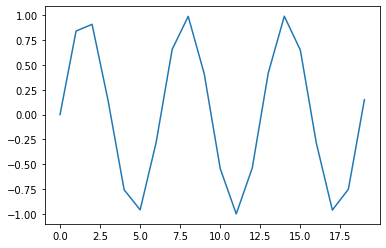

In [3]:
# plo the sincos
plt.plot(sin_wave[0:20])
plt.show()

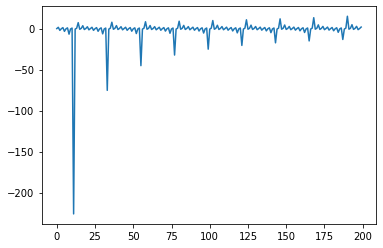

In [27]:
plt.plot(Tan_wave)
plt.show()

In [4]:
Data = sin_wave
print(Data.shape)

(200,)


In [5]:
# crate train data
X = []
Y = []

seq_len = 3
num_records = len(Data) - seq_len

for i in range(num_records - 50):
    X.append(Data[i:i+seq_len])
    Y.append(Data[i+seq_len])
X = np.array(X)
print(X.shape)
Y = np.array(Y)
print(Y.shape)

(147, 3)
(147,)


In [6]:
# convert X into 3 dimensional array
X = np.expand_dims(X, axis=2)
print(X.shape)
# convert Y into 2 dimensional array
Y = np.expand_dims(Y, axis=1)
print(Y.shape)

(147, 3, 1)
(147, 1)


In [7]:
# create test data
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(Data[i:i+seq_len])
    Y_val.append(Data[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)
print(X_val.shape)
print(type(X_val))

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)
print(Y_val.shape)
print(type(Y_val))

(50, 3, 1)
<class 'numpy.ndarray'>
(50, 1)
<class 'numpy.ndarray'>


In [8]:
# import keras & LSTM
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Activation

Using TensorFlow backend.


In [33]:
# Build Simple RNN
# Initialize the model
model = Sequential()
# add input layer
model.add(keras.layers.InputLayer(input_shape=(seq_len,1)))
# add RNN layer
model.add(SimpleRNN(units=10, activation=None, use_bias=False,
                    kernel_initializer='glorot_uniform',
                    recurrent_initializer='orthogonal', bias_initializer='zeros', 
                    kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None,
                    activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
                    bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, 
                    return_sequences=False, return_state=True, go_backwards=False, 
                    stateful=False, unroll=False))
# add output layer
model.add(Dense(1))

TypeError: All layers in a Sequential model should have a single output tensor. For multi-output layers, use the functional API.

In [10]:
from keras.optimizers import RMSprop
opt = RMSprop()
model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mae'])

In [11]:
# define the batch size and epochs
batch_size = 10
epochs = 10
# run the model with given data
model.fit(X, Y, batch_size=batch_size, epochs=epochs,
              validation_data=(X_val, Y_val),
              shuffle=False)

Train on 147 samples, validate on 50 samples
Epoch 1/10
147/147 [==============================] - 2s 15ms/step - loss: 0.1168 - mae: 0.2995 - val_loss: 0.0505 - val_mae: 0.2023
Epoch 2/10
147/147 [==============================] - 0s 337us/step - loss: 0.0276 - mae: 0.1458 - val_loss: 0.0096 - val_mae: 0.0882
Epoch 3/10
147/147 [==============================] - 0s 310us/step - loss: 0.0039 - mae: 0.0525 - val_loss: 4.9845e-04 - val_mae: 0.0201
Epoch 4/10
147/147 [==============================] - 0s 287us/step - loss: 1.2113e-04 - mae: 0.0079 - val_loss: 3.2803e-06 - val_mae: 0.0016
Epoch 5/10
147/147 [==============================] - 0s 250us/step - loss: 5.0498e-05 - mae: 0.0055 - val_loss: 2.6344e-05 - val_mae: 0.0046
Epoch 6/10
147/147 [==============================] - 0s 268us/step - loss: 8.1241e-05 - mae: 0.0078 - val_loss: 8.7107e-05 - val_mae: 0.0084
Epoch 7/10
147/147 [==============================] - 0s 257us/step - loss: 9.4684e-05 - mae: 0.0086 - val_loss: 1.5684e-04 

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.layers[1].get_weights()

[array([[ 0.4930532 ],
        [-0.31769282],
        [ 0.22150157],
        [-0.05794286],
        [-0.43729183],
        [ 0.40507704],
        [-0.65394324],
        [ 0.20922796],
        [ 0.49497482],
        [-0.65643305]], dtype=float32), array([-7.740431e-05], dtype=float32)]

In [13]:
# apply the model on train and test
Y_train_pred = model.predict(X)
Y_test_pred = model.predict(X_val)

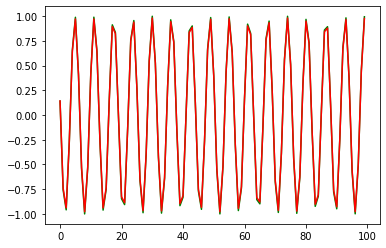

In [14]:
# plot train actual and predicted
plt.plot(Y[0:100], 'g')
plt.plot(Y_train_pred[0:100], 'r')
plt.show()

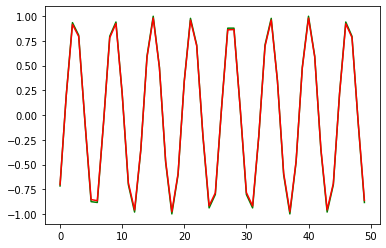

In [15]:
# plot test actual and predicted
plt.plot(Y_val, 'g')
plt.plot(Y_test_pred, 'r')
plt.show()

In [16]:
# calcualted RMSE
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(Y, Y_train_pred)))
print(math.sqrt(mean_squared_error(Y_val, Y_test_pred)))

0.01445522504664305
0.014380331194489072


In [32]:
# Build LSTM
from keras.layers import LSTM, RNN
# Initialize the model
model2 = RNN()
# add input layer
model2.add(keras.layers.InputLayer(input_shape=(seq_len,1)))
# add RNN layer
model2.add(LSTM(units=10, activation=None, recurrent_activation=None,
               use_bias=False, kernel_initializer='glorot_uniform', 
               recurrent_initializer='orthogonal', bias_initializer='zeros',
               unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None,
               bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
               recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
               recurrent_dropout=0.0, implementation=1, return_sequences=False,
               return_state=True, go_backwards=False, stateful=False, unroll=False))
# add output layer
model2.add(Dense(1))

TypeError: __init__() missing 1 required positional argument: 'cell'

In [30]:
from keras.optimizers import RMSprop, SGD
opt = RMSprop()
model2.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mae'])
# define the batch size and epochs
batch_size = 10
epochs = 10
# run the model with given data
model2.fit(X, Y, batch_size=batch_size, epochs=epochs,
              validation_data=(X_val, Y_val),
              shuffle=False)

ValueError: Error when checking target: expected dense_5 to have 3 dimensions, but got array with shape (147, 1)

In [19]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [20]:
# apply the model on train and test
Y_train_pred = model2.predict(X)
Y_test_pred = model2.predict(X_val)

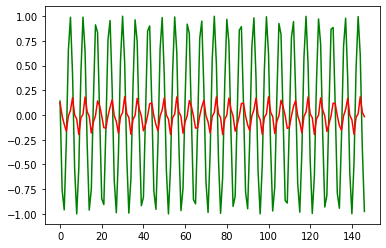

In [21]:
# plot train actual and predicted
plt.plot(Y, 'g')
plt.plot(Y_train_pred, 'r')
plt.show()

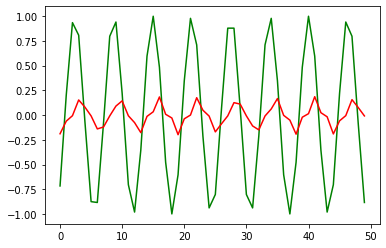

In [22]:
# plot test actual and predicted
plt.plot(Y_val, 'g')
plt.plot(Y_test_pred, 'r')
plt.show()

In [23]:
# calcualted RMSE
print(math.sqrt(mean_squared_error(Y, Y_train_pred)))
print(math.sqrt(mean_squared_error(Y_val, Y_test_pred)))

0.6566448171990434
0.6543746535156271


In [24]:
# Build GRU
from keras.layers import GRU
# Initialize the model
model3 = Sequential()
# add input layer
model3.add(keras.layers.InputLayer(input_shape=(3,1)))
# add RNN layer
model3.add(GRU(units=10, activation=None, recurrent_activation=None,
               use_bias=False, kernel_initializer='glorot_uniform', 
               recurrent_initializer='orthogonal', bias_initializer='zeros',
               kernel_regularizer=None, recurrent_regularizer=None,
               bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
               recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
               recurrent_dropout=0.0, implementation=1, return_sequences=False,
               return_state=False, go_backwards=False, stateful=False, unroll=False))
# add output layer
model3.add(Dense(1))

In [25]:
from keras.optimizers import RMSprop
opt = RMSprop()
model3.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mae'])
# define the batch size and epochs
batch_size = 10
epochs = 10
# run the model with given data
model3.fit(X, Y, batch_size=batch_size, epochs=epochs,
              validation_data=(X_val, Y_val),
              shuffle=False)

Train on 147 samples, validate on 50 samples
Epoch 1/10
147/147 [==============================] - 1s 6ms/step - loss: 0.7060 - mae: 0.7540 - val_loss: 0.6630 - val_mae: 0.7227
Epoch 2/10
147/147 [==============================] - 0s 382us/step - loss: 0.6359 - mae: 0.7160 - val_loss: 0.6042 - val_mae: 0.6908
Epoch 3/10
147/147 [==============================] - 0s 333us/step - loss: 0.5798 - mae: 0.6839 - val_loss: 0.5504 - val_mae: 0.6597
Epoch 4/10
147/147 [==============================] - 0s 418us/step - loss: 0.5269 - mae: 0.6520 - val_loss: 0.4985 - val_mae: 0.6300
Epoch 5/10
147/147 [==============================] - 0s 415us/step - loss: 0.4752 - mae: 0.6193 - val_loss: 0.4473 - val_mae: 0.5987
Epoch 6/10
147/147 [==============================] - 0s 403us/step - loss: 0.4237 - mae: 0.5850 - val_loss: 0.3958 - val_mae: 0.5634
Epoch 7/10
147/147 [==============================] - 0s 386us/step - loss: 0.3712 - mae: 0.5464 - val_loss: 0.3425 - val_mae: 0.5246
Epoch 8/10
147/147 

In [26]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 10)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [57]:
# apply the model on train and test
Y_train_pred = model3.predict(X)
Y_test_pred = model3.predict(X_val)

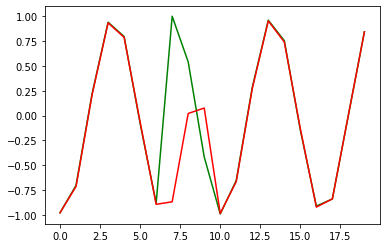

In [58]:
# plot train actual and predicted
plt.plot(Y[190:210], 'g')
plt.plot(Y_train_pred[190:210], 'r')
plt.show()

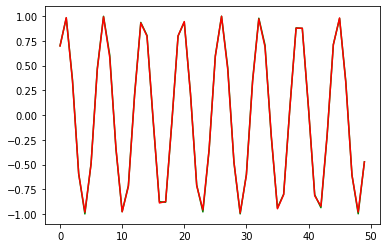

In [59]:
# plot test actual and predicted
plt.plot(Y_val, 'g')
plt.plot(Y_test_pred, 'r')
plt.show()

In [61]:
print(math.sqrt(mean_squared_error(Y, Y_train_pred)))
print(math.sqrt(mean_squared_error(Y_val, Y_test_pred)))

0.10787133720401396
0.010181844149328637
